# Linear Regression

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable

This week, your task involves conducting multi-class linear regression on batsmen salaries. You'll use the average runs scored per game and the strike rate as independent variables. The goal is to predict the salary as the dependent variable. Additionally, you'll be categorizing the data based on the years.

The dataset is Data_Mendeley.csv given on GitHub. Feel free to create any new functions required.

In [4]:
#import important libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

preparing data

In [ ]:
#mounting gdrive

In [ ]:
from google.colab import drive
from sklearn.preprocessing import StandardScaler
import pandas as pd
drive.mount('/content/gdrive')
path='/content/gdrive/My Drive/Colab Notebooks/Data_Mendeley.csv'
read=pd.read_csv(path)
#extracting data according to a particular batsmen using his id
batsman_id= 1
batsman_data=read[read['Id']==batsman_id]
X = batsman_data[['Ave', 'StrRate']]

scaler=StandardScaler()
X_normalized=scaler.fit_transform(X)

y=batsman_data['Final Price']

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=1234)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Forward pass

In [ ]:
def forward(x):
  pass

Mean Squared Loss

In [ ]:

def loss(y,y_pred): #Mean Squared Loss
  return np.mean((y-y_pred)**2)
  pass

Implement Linear regression here :)

Mean Squared Error: 76963910341044.56


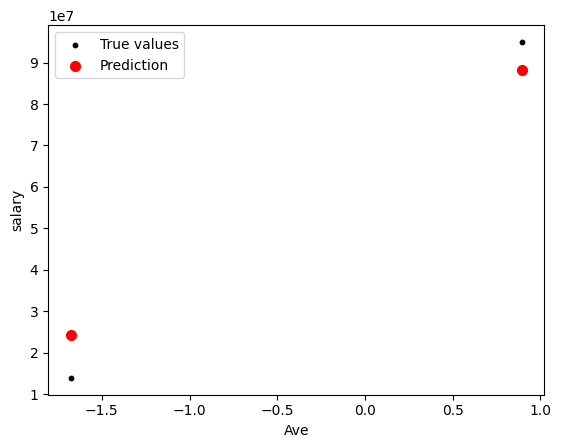

In [ ]:

class LinearRegression:
    def __init__(self, lr=0.1, iters=1000):
        self.lr = lr
        self.iters = iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        samples, features = X.shape
        self.weights = np.zeros(features)
        self.bias = 0
        for _ in range(self.iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / samples) * np.dot(X.T, (y_pred - y))
            db = (1 / samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db


    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred


# Initiating linear regression
reg = LinearRegression(lr=0.05)

# Fitting the model
reg.fit(X_train, y_train)

# Making predictions on the test data
y_pred = reg.predict(X_test)

# Calculate Mean Squared Error
mse = loss(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plotting  the results
plt.scatter(X_test[:, 0], y_test, color='black', s=10, label='True values')
plt.scatter(X_test[:, 0], y_pred, color='red', linewidth=2, label='Prediction')
plt.xlabel('Ave')
plt.ylabel('salary')
plt.legend()
plt.show()


# Logistic Regression

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on.

In this week you will be doing logistic regression on breast cancer dataset using sklearn library. Feel free to create any new functions required.

In [1]:
#importinf libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

Prepare Data

In [5]:
breast_cancer = datasets.load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

In [6]:
#spliting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Forward pass

In [7]:
def forward_log(x):
  pass

Binary cross entropy loss

In [8]:
def BCELoss(y,y_pred):
  loss = -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
  mean_loss=np.mean(loss)
  return mean_loss
  pass

Implement Logistic Regression here :)

In [11]:

def sigmoid(x):
  return (1/(1 + np.exp(-x)))



class LogisticRegression:
    def __init__(self, lr=0.01, iters=1000):
        self.lr = lr
        self.iters = iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        samples, features = X.shape
        self.weights = np.zeros(features)
        self.bias = 0
        for _ in range(self.iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            y_pred=sigmoid(linear_pred)

            dw = (1 / samples) * np.dot(X.T, (y_pred - y))
            db = (1 / samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        return y_pred

# Initiating logistic regression
reg = LogisticRegression()

# Fitting the model
reg.fit(X_train, y_train)

# Making predictions on the test data
y_pred = reg.predict(X_test)

#class prediction
class_pred=[0 if y<=0.5 else 1 for y in y_pred]

y_test = np.array(y_test)
y_pred = np.array(y_pred)

bce=BCELoss(y_test, y_pred)
print(f'Binary cross entropy loss {bce}')





Binary cross entropy loss 0.16113495819476906
